# UK Biobank Gender-Based Feature and Outcome Exploration

This notebook loads train, validation, and test datasets, combines them, and explores differences in feature and outcome distributions by gender.

In [1]:
# 1. Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from importlib import reload

# For data loading from pipeline
import sys
sys.path.append(os.path.abspath('cancer_prediction_pipeline'))
import data_loader
import config

In [2]:
# 2. Load Train, Validation, and Test DataFrames
train_df, valid_df, test_df = data_loader.load_datasets()
print(f"Train shape: {train_df.shape}")
print(f"Valid shape: {valid_df.shape}")
print(f"Test shape: {test_df.shape}")

Train shape: (31797, 3028)
Valid shape: (10599, 3028)
Test shape: (10599, 3028)


In [30]:
# 3. Combine DataFrames into a Single DataFrame
cancer_types = [
        "skin",
        "prostate", 
        "breast",  
        "colorectal", 
        "lung",         # Lung cancer
        "colorectal",   # Colorectal cancer
        "bladder",      # Bladder cancer
    ]
all_df = pd.concat([train_df, valid_df, test_df], axis=0, ignore_index=True)
print(f"Combined shape: {all_df.shape}")
all_df['Sex'] = all_df['Sex_male'].map({1: 'Male', 0: 'Female'})
y, class_mapping = data_loader.get_y_multiclass(all_df, cancer_types)

Combined shape: (52995, 3028)


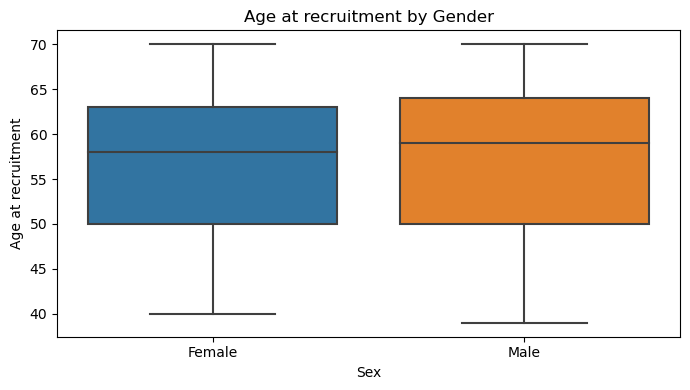

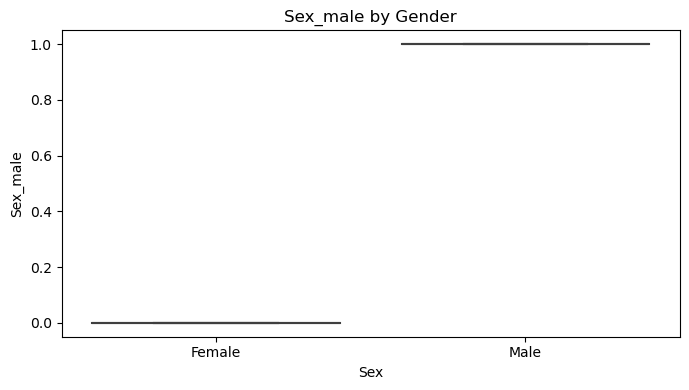

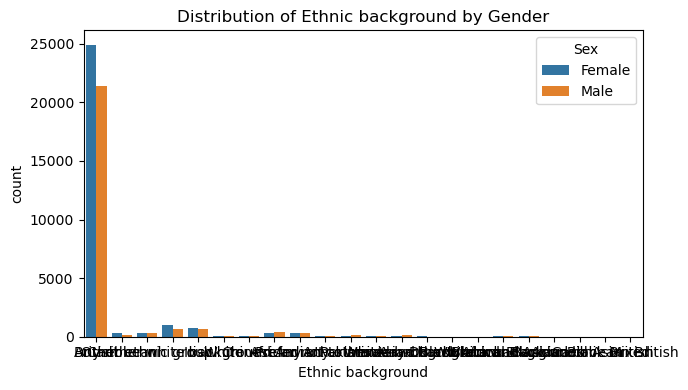

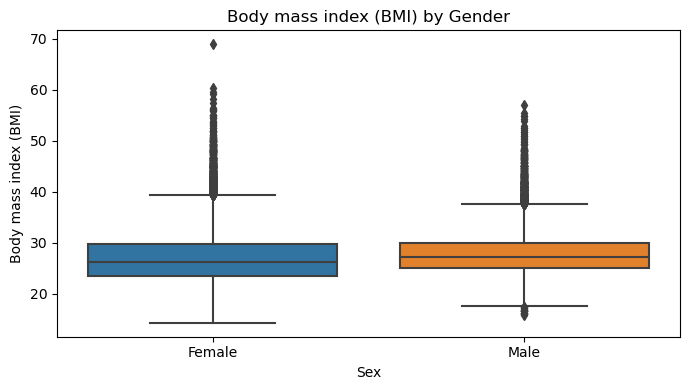

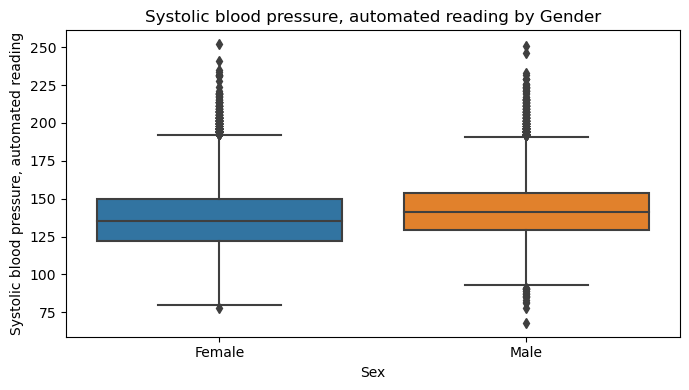

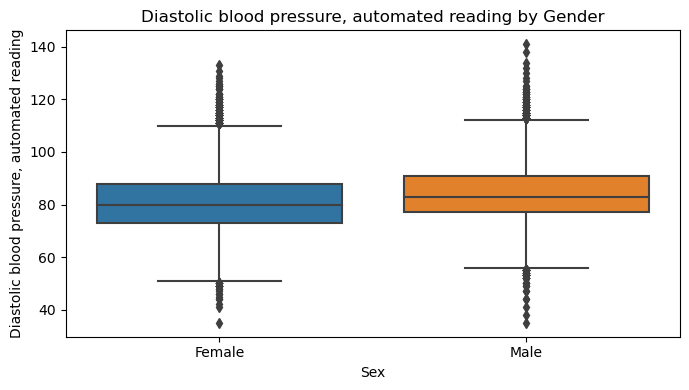

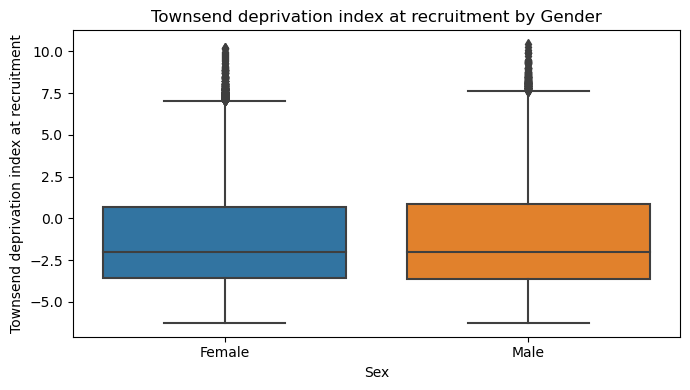

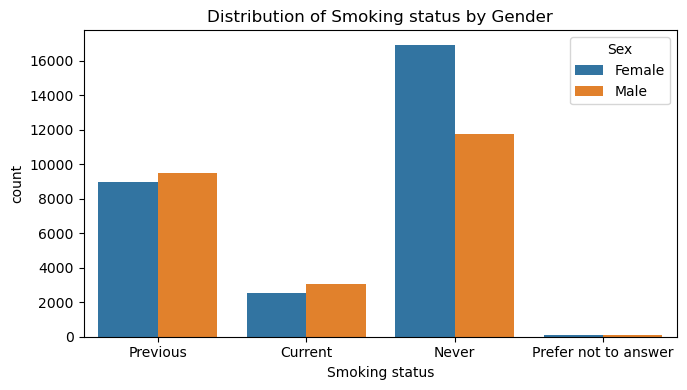

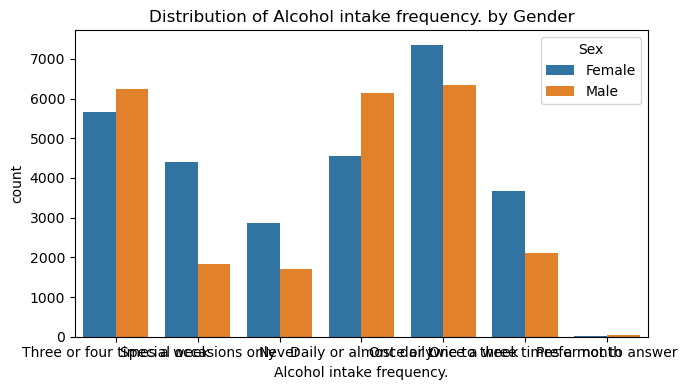

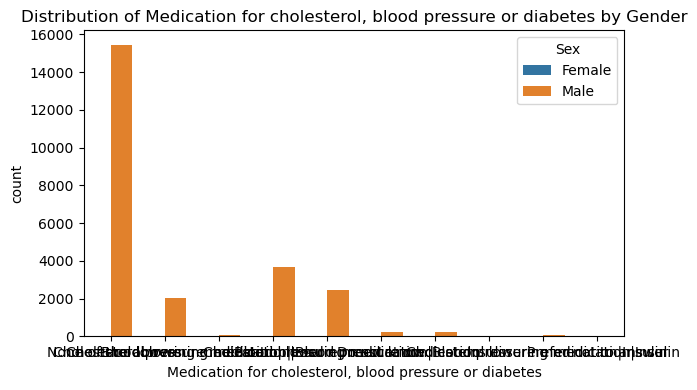

In [4]:
# 4. Explore Feature Column Distributions by Gender
feature_cols = [col for col in all_df.columns if col in config.DEMO_FEATURES]

for col in feature_cols:
    plt.figure(figsize=(7,4))
    if all_df[col].dtype.name == 'category' or all_df[col].dtype == object:
        sns.countplot(data=all_df, x=col, hue='Sex')
        plt.title(f'Distribution of {col} by Gender')
    else:
        sns.boxplot(data=all_df, x='Sex', y=col)
        plt.title(f'{col} by Gender')
    plt.tight_layout()
    plt.show()

In [29]:
y[1]

{0: 'no_cancer',
 1: 'skin',
 2: 'prostate',
 3: 'breast',
 4: 'colorectal',
 5: 'lung',
 6: 'colorectal',
 7: 'bladder',
 8: 'other_cancer'}

In [28]:
y[0].value_counts()

0    52389
8      191
1      169
3       86
2       79
4       42
5       30
7        9
dtype: int64

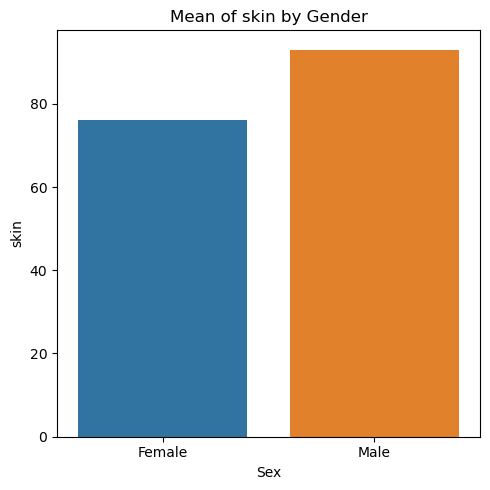

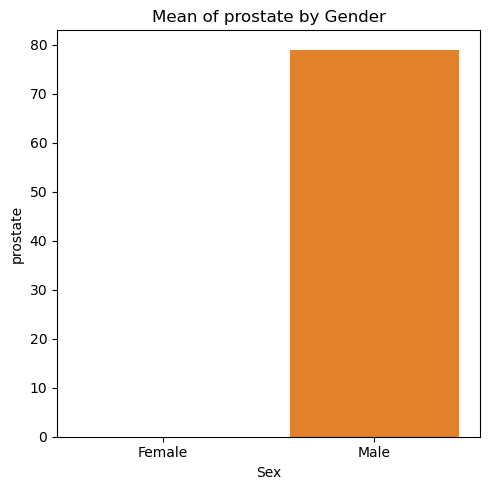

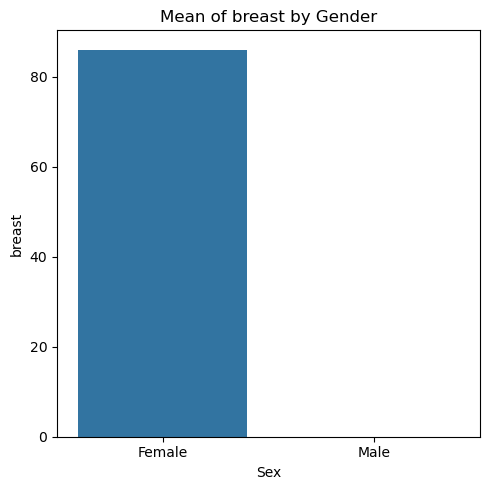

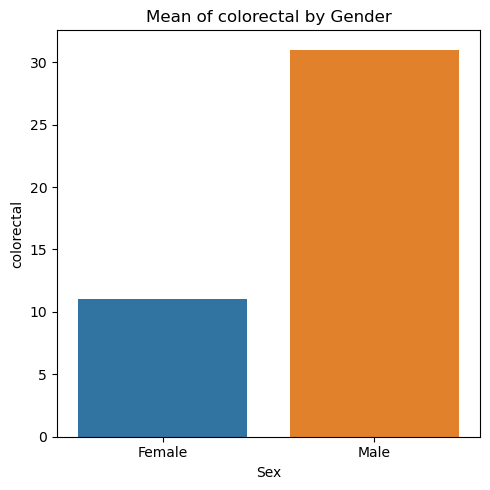

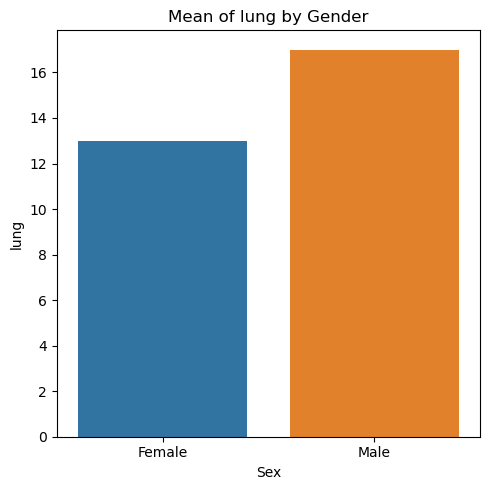

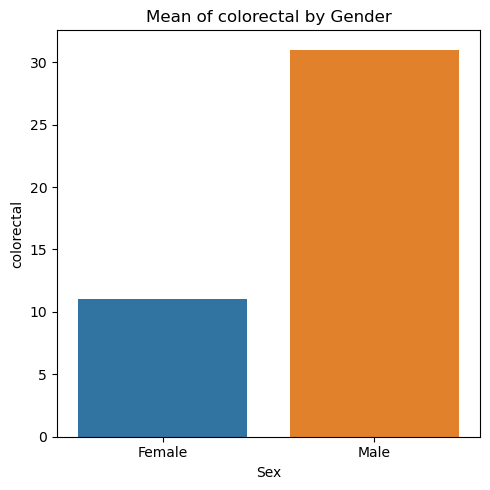

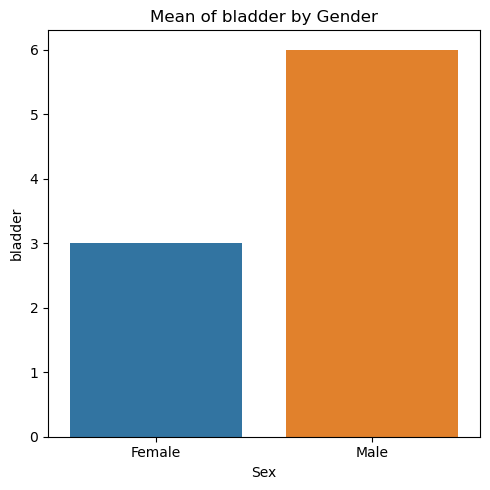

In [43]:
# 5. Explore Outcome Column Distributions by Gender
# outcome_cols = [f"{cancer}_cancer" for cancer in cancer_types]

# y = pd.Series(y).map(class_mapping)
# y = pd.get_dummies(y)

# plot_df = pd.concat(
#     [all_df[['Sex']].reset_index(drop=True),
#      y.reset_index(drop=True)],
#     axis=1
# )

for col in cancer_types:
    plt.figure(figsize=(5,5))
    sns.barplot(x='Sex', y=col, data=plot_df, estimator=np.sum, errorbar=None)
    plt.title(f'Mean of {col} by Gender')
    plt.tight_layout()
    plt.savefig(f"cancer_by_gender_{col}.png", dpi=150, bbox_inches='tight')
    plt.show()

In [44]:
# Find all olink columns
olink_cols = [col for col in all_df.columns if col.startswith('olink_')]

diff_list = []
for col in olink_cols:
    means = all_df.groupby('Sex')[col].mean()
    if 'Male' in means and 'Female' in means:
        diff = abs(means['Male'] - means['Female'])
        diff_list.append({'olink_col': col, 'abs_diff': diff, 'male_mean': means['Male'], 'female_mean': means['Female']})

diff_df = pd.DataFrame(diff_list)
diff_df = diff_df.sort_values('abs_diff', ascending=False)
diff_df.reset_index(drop=True, inplace=True)
diff_df.head(20)  # Show top 20 olink columns by absolute gender difference

,olink_col,abs_diff,male_mean,female_mean
0,olink_spint3,5.079943,3.856062,-1.223881
1,olink_klk3,2.600543,2.045930,-0.554614
2,olink_insl3,2.578211,2.091127,-0.487084
3,olink_pspn,2.106442,1.082699,-1.023743
4,olink_acrv1,1.817462,1.419800,-0.397663
5,olink_cga,1.712658,-0.718006,0.994652
6,olink_fshb,1.468013,-0.317443,1.150570
7,olink_eddm3b,1.426811,0.991489,-0.435322
8,olink_gh1,1.390100,-0.511261,0.878839
9,olink_lep,1.363359,-0.815363,0.547996


In [47]:
diff_df['abs_diff'].mean()

0.08785050802288225

/tmp/ipykernel_40344/1444590721.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='Sex', y=col, data=all_df, ci='sd', palette='pastel')
/tmp/ipykernel_40344/1444590721.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='Sex', y=col, data=all_df, ci='sd', palette='pastel')
/tmp/ipykernel_40344/1444590721.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='Sex', y=col, data=all_df, ci='sd', palette='pastel')
/tmp/ipykernel_40344/1444590721.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='Sex', y=col, data=all_df, ci='sd', palette='pastel')
/tmp/ipykernel_40344/1444590721.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='Sex', y=col, data=all_df, ci='sd', palette='past

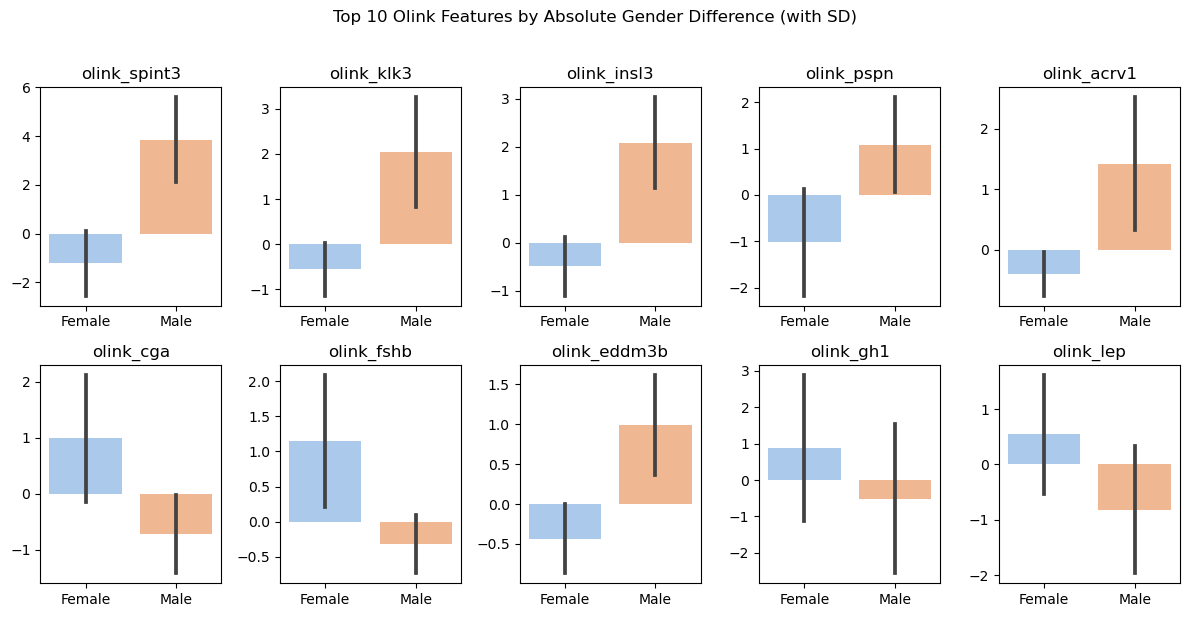

In [45]:
# Plot top 10 olink columns with greatest absolute gender difference, including standard deviation bars
top_olinks = diff_df.head(10)['olink_col'].tolist()
plt.figure(figsize=(12, 6))
for i, col in enumerate(top_olinks):
    plt.subplot(2, 5, i+1)
    sns.barplot(x='Sex', y=col, data=all_df, ci='sd', palette='pastel')
    plt.title(col)
    plt.xlabel('')
    plt.ylabel('')
    plt.tight_layout()
    plt.suptitle('Top 10 Olink Features by Absolute Gender Difference (with SD)', y=1.02)
plt.show()

/tmp/ipykernel_40344/216813502.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='Sex', y=col, data=all_df, ci='sd', palette='pastel')
/tmp/ipykernel_40344/216813502.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='Sex', y=col, data=all_df, ci='sd', palette='pastel')
/tmp/ipykernel_40344/216813502.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='Sex', y=col, data=all_df, ci='sd', palette='pastel')
/tmp/ipykernel_40344/216813502.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='Sex', y=col, data=all_df, ci='sd', palette='pastel')
/tmp/ipykernel_40344/216813502.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='Sex', y=col, data=all_df, ci='sd', palette='pastel')


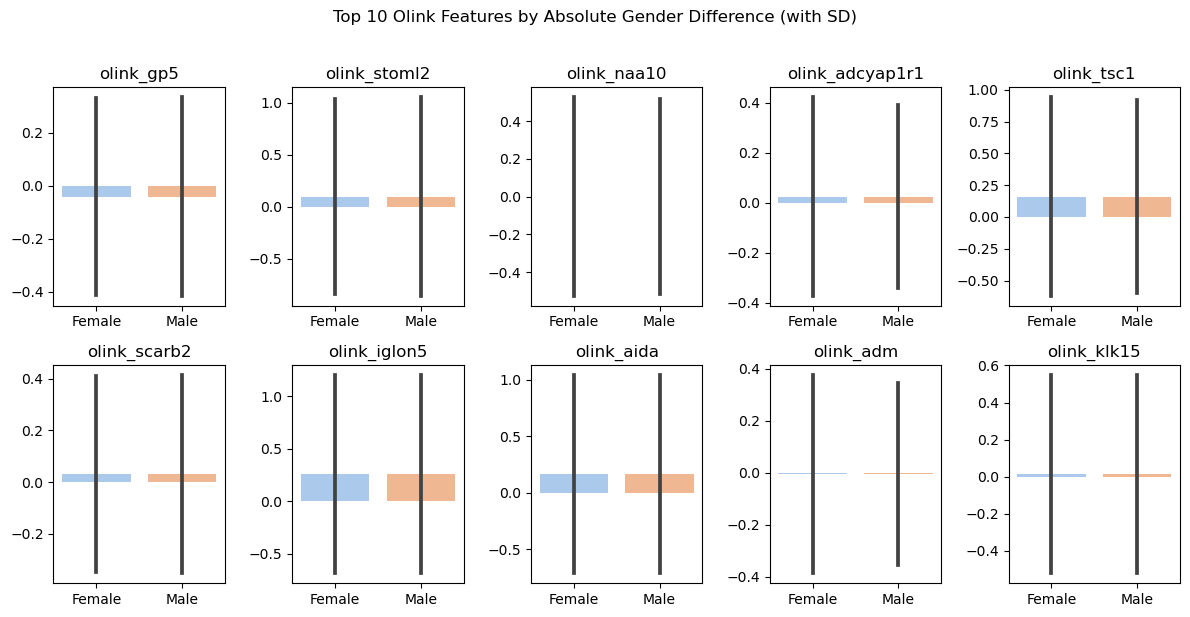

In [46]:
top_olinks = diff_df.tail(10)['olink_col'].tolist()
plt.figure(figsize=(12, 6))
for i, col in enumerate(top_olinks):
    plt.subplot(2, 5, i+1)
    sns.barplot(x='Sex', y=col, data=all_df, ci='sd', palette='pastel')
    plt.title(col)
    plt.xlabel('')
    plt.ylabel('')
    plt.tight_layout()
    plt.suptitle('Top 10 Olink Features by Absolute Gender Difference (with SD)', y=1.02)
plt.show()